# Code for generating senesitivity analysis data

In [10]:
import os
import numpy as np
from multigrids import TemporalMultiGrid, TemporalGrid
data_dir = "/Users/rwspicer/Desktop/data/V1/"

save_dir = "/Volumes/toshi-stati/data/V1/master-project/training/ACP/v2/"

feature_file = os.path.join(
    data_dir,
    "master-project/training/ACP/v2/baseline/multigrid/ACP-training-base.yml'"
)
label_file = os.path.join(
    data_dir,
    "thermokarst/initiation-regions/ACP/v4/PDM-5var/without_predisp/multigrid/ACP-TKI-PDM5.yml"
)

In [6]:
base_features = TemporalMultiGrid(feature_file)
labels = TemporalGrid(label_file)

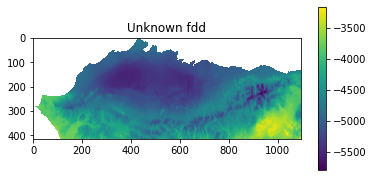

TemporalMultiGrid version of get_as_ml_features,

        Parameters
        ----------
        mask: np.array
            2d array of boolean values where true indicates data to get from
            the 2d array mask is applied to 
        train_range: list like, or None(default)
            [int, int], min an max years to get the features from the temporal 
            multigrid

        


In [7]:
# base_features.dataset_name = base_features.config['dataset_name']
base_features.show_figure('fdd', 1901)
print(base_features.get_as_ml_features.__doc__)

In [8]:
for i in labels.config.keys():
    print(i)

cfg_path
data_model
data_type
dataset_name
dataset_version
description
filename
grid_name_map
grid_shape
mask
mode
multigrids_version
num_grids
num_timesteps
raster_metadata
start_timestep
timestep
memory_shape
real_shape


In [26]:
os.listdir(save_dir)

def save_data (name, mg, save_dir=save_dir):
    save_loc = os.path.join(save_dir, name, 'multigrid')
    try:
        os.makedirs(save_loc)
    except:
        pass
    mg.save(os.path.join(save_loc, name+'.yml'))
    

In [27]:
no_lat_long = list(base_features.config['grid_name_map'].keys())
no_lat_long.remove('lat')
no_lat_long.remove('long')
no_lat_long_subset_features = base_features.create_subset(no_lat_long)

no_lat_long_subset_features.config['dataset_name'] = 'ACP training data - no geolocation'
no_lat_long_subset_features.config['description'] = 'ACP training data without lat and long as features'
save_data('no-geolocation', no_lat_long_subset_features)
del(no_lat_long_subset_features)

In [28]:
no_top_4 = list(base_features.config['grid_name_map'].keys())
no_top_4.remove('lat')
no_top_4.remove('long')
no_top_4.remove('fwp')
no_top_4.remove('tdd+1')
no_top_4_features = base_features.create_subset(no_top_4)

no_top_4_features.config['dataset_name'] = 'ACP training data - remove most important 4 features'
no_top_4_features.config['description'] = """
    ACP training data without  most important 4 features :FWP, lat, long, and TDD+1.
    These all had FI > ~10%"""
    
save_data('without-high-importance', no_top_4_features)
del(no_top_4_features)

In [32]:
# no_top_climate = list(base_features.config['grid_name_map'].keys())
# no_top_climate.remove('lat')
# no_top_climate.remove('long')
# no_top_climate.remove('fwp')
# no_top_climate.remove('tdd+1')
# no_top_climate_features = base_features.create_subset(no_top_climate)

In [33]:
# no_fwp = list(base_features.config['grid_name_map'].keys())
# no_fwp.remove('fwp')
# no_fwp_features = base_features.create_subset(no_fwp)

In [29]:
no_elev_info = list(base_features.config['grid_name_map'].keys())
no_elev_info.remove('aspect')
no_elev_info.remove('slope')
no_elev_info.remove('elev')
no_elev_features = base_features.create_subset(no_elev_info)


no_elev_features.config['dataset_name'] = 'ACP training data - remove slope/elev'
no_elev_features.config['description'] = """
    ACP training data without elevation related featuers: elev,slope,and aspect.
    Coincdently these all had FI << ~1%, and were the bottom performing """
    
save_data('without-elevation', no_elev_features)
del(no_elev_features)

In [50]:
base_features.config['real_shape']


def add_empty_grids(self, new_grids):
    rows = self.config['grid_shape'][0]
    cols = self.config['grid_shape'][1]
    num_ts = self.config['num_timesteps']
    n_grids = self.config['num_grids'] + len(new_grids)
    
    old_grids = list(self.config['grid_name_map'].keys())
    #print(  n_grids, old_grids, new_grids, list(old_grids) + list(new_grids))
    superset = TemporalMultiGrid(rows, cols, n_grids, num_ts,
        grid_names = old_grids + new_grids,
        data_type=self.config['data_type'],
        mask = self.config['mask'],
    )
    
    try:
        superset.config['description'] = \
            self.config['description'] + ' superset.'
    except KeyError:
        superset.config['description'] = 'Unknown superset.'

    try:
        superset.config['dataset_name'] = \
            superset.config['dataset_name'] + ' superset.'
    except KeyError:
        superset.config['dataset_name'] = 'Unknown superset.'

    superset.config['start_timestep'] = self.config['start_timestep']
    superset.config['timestep'] = self.config['timestep']

    for idx, grid in enumerate(old_grids):
        superset[grid][:] = self[grid][:]

    return superset

TemporalMultiGrid.add_empty_grids = add_empty_grids



In [87]:
base_features = TemporalMultiGrid(feature_file)
with_labels = base_features.add_empty_grids(['labels',])
with_labels.config['dataset_name'] = "'ACP training data - with labels"
with_labels.config['description'] = "'ACP training data - with labels"
with_labels['labels'][:] = labels.grids.reshape(with_labels['labels'].shape)

save_data('with-labels', with_labels)
del(with_labels)

In [94]:

base_features = TemporalMultiGrid(feature_file)
with_random = base_features.add_empty_grids(['random',])
with_random.config['dataset_name'] = "'ACP training data - with random data"
with_random.config['description'] = "'ACP training data - random data"
with_random['random'][:] = np.random.random(with_random['random'].shape)

save_data('with-labels', with_random)
del(with_random)